# IndoXTC - Fine-tune Head Prosa [XLM-R]
Exploring Indonesian hate speech/abusive & sentiment text classification using multilingual language model.

This kernel is a part of my undergraduate final year project.
Checkout the full github repository:
https://github.com/ilhamfp/indonesian-text-classification-multilingual

In [1]:
#############################
# Experiment configurations #
#############################

INDO_DATA_NAME = 'prosa'
DATA_PATH_INDO = '../input/indoxtc-extracting-prosa-features-xlm-r'

FOREIGN_DATA_NAME = 'yelp'
DATA_PATH_FOREIGN = '../input/indoxtc-combining-yelp-features-xlm-r'

MODEL_NAME = 'XLM_R'

EXPERIMENT_TYPE_LIST = ['A', 'B', 'C'] # A / B / C
TOTAL_DATA = 10981 # 500 / 1000 / 2500 / 5000 / 7500 / 10981
FOREIGN_LANG_DATA_MULT_LIST = [0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 6]
RANDOM_SEED = 1
VALIDATION_DATA = 0.1

In [2]:
import os
import numpy as np
import pandas as pd
from load_data import load_experiment_features
from model_head import set_seed, train, test, evaluate

CUDA is not available.  Training on CPU ...


## Experiment

In [3]:
result_list = []
for EXPERIMENT_TYPE in EXPERIMENT_TYPE_LIST:
    for FOREIGN_LANG_DATA_MULT in FOREIGN_LANG_DATA_MULT_LIST:
        set_seed(seed=RANDOM_SEED)
        if EXPERIMENT_TYPE != 'C':
            print('\n~~Result_{}_{}~~'.format(EXPERIMENT_TYPE,
                                               TOTAL_DATA))
        else:
            print('\n~~Result_{}_{}_{}~~'.format(EXPERIMENT_TYPE,
                                           TOTAL_DATA,
                                           FOREIGN_LANG_DATA_MULT))

        train_loader, valid_loader, test_loader = load_experiment_features(DATA_PATH_INDO,
                                                                           DATA_PATH_FOREIGN,
                                                                           tipe=EXPERIMENT_TYPE, 
                                                                           total_data=TOTAL_DATA, 
                                                                           foreign_mult=FOREIGN_LANG_DATA_MULT,
                                                                           valid_size=VALIDATION_DATA)
        
        train(train_loader, valid_loader)
        y_true, y_pred_proba = test(test_loader)
        max_f1, max_recall, max_precision = evaluate(y_true, y_pred_proba)

        result = pd.DataFrame({
            'y_true': y_true,
            'y_pred_proba': y_pred_proba
        })
        result.to_csv('result_{}_{}_{}_{}_{}_{}_head.csv'.format(INDO_DATA_NAME,
                                                            FOREIGN_DATA_NAME,
                                                            MODEL_NAME,
                                                            EXPERIMENT_TYPE,
                                                            TOTAL_DATA,
                                                            FOREIGN_LANG_DATA_MULT), 
                      index=False)
        

        result_list.append({
            'tipe':EXPERIMENT_TYPE,
            'total_data':TOTAL_DATA, 
            'foreign_mult':FOREIGN_LANG_DATA_MULT,
            'total_foreign_data':int(TOTAL_DATA*FOREIGN_LANG_DATA_MULT) if EXPERIMENT_TYPE=='C' else 0,
            'max_f1':max_f1,
            'max_recall':max_recall,
            'max_precision':max_precision
        })
        
        os.remove("model.pt")

        if EXPERIMENT_TYPE != 'C':
            break


~~Result_A_10981~~
EarlyStopping! Epoch 55
Last: 49 	T-Loss: 0.299478 	T-Acc: 0.877859 	V-Loss: 0.282874 	V-Acc: 0.896175
Test Loss: 0.488595
Test accuracy: 0.737864
##MAX## 
THRESHOLD: 0.330 	F1: 0.81063945 	Recall: 0.81730769 	Prec: 0.80952381

~~Result_B_10981~~
EarlyStopping! Epoch 50
Last: 44 	T-Loss: 0.473694 	T-Acc: 0.817078 	V-Loss: 0.532415 	V-Acc: 0.700364
Test Loss: 0.607461
Test accuracy: 0.674757


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##MAX## 
THRESHOLD: 0.600 	F1: 0.73517323 	Recall: 0.75961538 	Prec: 0.72811060

~~Result_C_10981_0.25~~


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


EarlyStopping! Epoch 38
Last: 32 	T-Loss: 0.343248 	T-Acc: 0.856067 	V-Loss: 0.289750 	V-Acc: 0.879781
Test Loss: 0.483879
Test accuracy: 0.766990
##MAX## 
THRESHOLD: 0.300 	F1: 0.81241611 	Recall: 0.86538462 	Prec: 0.78602620

~~Result_C_10981_0.5~~
EarlyStopping! Epoch 51
Last: 45 	T-Loss: 0.352169 	T-Acc: 0.849018 	V-Loss: 0.284919 	V-Acc: 0.894353
Test Loss: 0.465808
Test accuracy: 0.781553
##MAX## 
THRESHOLD: 0.360 	F1: 0.82276437 	Recall: 0.79807692 	Prec: 0.84263959

~~Result_C_10981_0.75~~
EarlyStopping! Epoch 44
Last: 38 	T-Loss: 0.356235 	T-Acc: 0.851047 	V-Loss: 0.295426 	V-Acc: 0.884335
Test Loss: 0.463468
Test accuracy: 0.786408
##MAX## 
THRESHOLD: 0.310 	F1: 0.83003300 	Recall: 0.84134615 	Prec: 0.82547170

~~Result_C_10981_1~~
EarlyStopping! Epoch 49
Last: 43 	T-Loss: 0.360626 	T-Acc: 0.848318 	V-Loss: 0.303723 	V-Acc: 0.877049
Test Loss: 0.454596
Test accuracy: 0.793689
##MAX## 
THRESHOLD: 0.340 	F1: 0.83735469 	Recall: 0.84134615 	Prec: 0.83732057

~~Result_C_10981_1.5

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


EarlyStopping! Epoch 25
Last: 19 	T-Loss: 0.355732 	T-Acc: 0.849790 	V-Loss: 0.349133 	V-Acc: 0.843352
Test Loss: 0.430309
Test accuracy: 0.815534
##MAX## 
THRESHOLD: 0.440 	F1: 0.83429153 	Recall: 0.76442308 	Prec: 0.89325843

~~Result_C_10981_6~~
EarlyStopping! Epoch 21
Last: 15 	T-Loss: 0.355116 	T-Acc: 0.849378 	V-Loss: 0.350797 	V-Acc: 0.836066
Test Loss: 0.418207
Test accuracy: 0.827670
##MAX## 
THRESHOLD: 0.440 	F1: 0.83730100 	Recall: 0.80769231 	Prec: 0.86153846


## Save

In [4]:
final_result = pd.DataFrame(result_list) 

if len(EXPERIMENT_TYPE_LIST) == 1:
    final_result.to_csv('final_{}_{}_{}_result_{}_{}.csv'.format(INDO_DATA_NAME,
                                                              FOREIGN_DATA_NAME,
                                                              MODEL_NAME,
                                                              EXPERIMENT_TYPE_LIST[0],
                                                              TOTAL_DATA), 
                        index=False)

else:
    final_result.to_csv('final_{}_{}_{}_result_combined_{}.csv'.format(INDO_DATA_NAME,
                                                                       FOREIGN_DATA_NAME,
                                                                       MODEL_NAME,
                                                                       TOTAL_DATA),
                        index=False)
    
print(final_result.shape)
final_result.head()

(12, 7)


,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
0,A,10981,0.25,0,0.810639,0.817308,0.809524
1,B,10981,0.25,0,0.735173,0.759615,0.728111
2,C,10981,0.25,2745,0.812416,0.865385,0.786026
3,C,10981,0.50,5490,0.822764,0.798077,0.842640
4,C,10981,0.75,8235,0.830033,0.841346,0.825472


## Plot

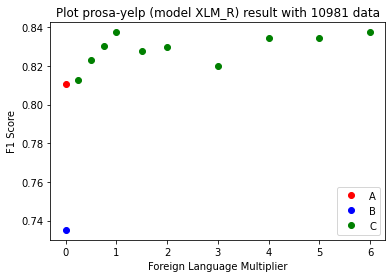

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

if 'A' in EXPERIMENT_TYPE_LIST:
    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'A'].max_f1.values), 
             final_result[final_result['tipe'] == 'A'].max_f1.values, 'ro', label='A')

if 'B' in EXPERIMENT_TYPE_LIST:
    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'B'].max_f1.values), 
             final_result[final_result['tipe'] == 'B'].max_f1.values, 'bo', label='B')

if 'C' in EXPERIMENT_TYPE_LIST:
    plt.plot(final_result[final_result['tipe'] == 'C'].foreign_mult.values, 
             final_result[final_result['tipe'] == 'C'].max_f1.values, 'go', label='C')

plt.legend(loc="lower right")
plt.xlabel('Foreign Language Multiplier')
plt.ylabel('F1 Score')
plt.title('Plot {}-{} (model {}) result with {} data'.format(INDO_DATA_NAME,
                                                             FOREIGN_DATA_NAME,
                                                             MODEL_NAME,
                                                             TOTAL_DATA))
    
plt.show()
    